<a href="https://colab.research.google.com/github/rekhachakkara/python_projects/blob/master/hr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


         sales  total
4   management    630
3           hr    739
2   accounting    767
1        RandD    787
5    marketing    858
6  product_mng    902
0           IT   1227
8      support   2229
9    technical   2720
7        sales   4140
         sales   tot  rank
0           IT   273   4.0
1        RandD   121   9.0
2   accounting   204   6.0
3           hr   215   5.0
4   management    91  10.0
5    marketing   203   7.0
6  product_mng   198   8.0
7        sales  1014   1.0
8      support   555   3.0
9    technical   697   2.0
    left        sales  time_spend_company  average_montly_hours
0      0           IT            3.356394            198.886792
1      0        RandD            3.252252            198.951952
2      0   accounting            3.424512            199.037300
3      0           hr            3.192748            199.250000
4      0   management            4.395176            200.233766
5      0    marketing            3.480916            198.888550
6      0  pro

<ipython-input-13-c10022195370>:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_avg_time_spend = excel_sheet.groupby(["left", "sales"])["time_spend_company","average_montly_hours"].mean().reset_index()
<ipython-input-13-c10022195370>:56: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_avg_time_spend.corr(), annot=True, linewidth= 0.5, cmap='Blues')


<Axes: >

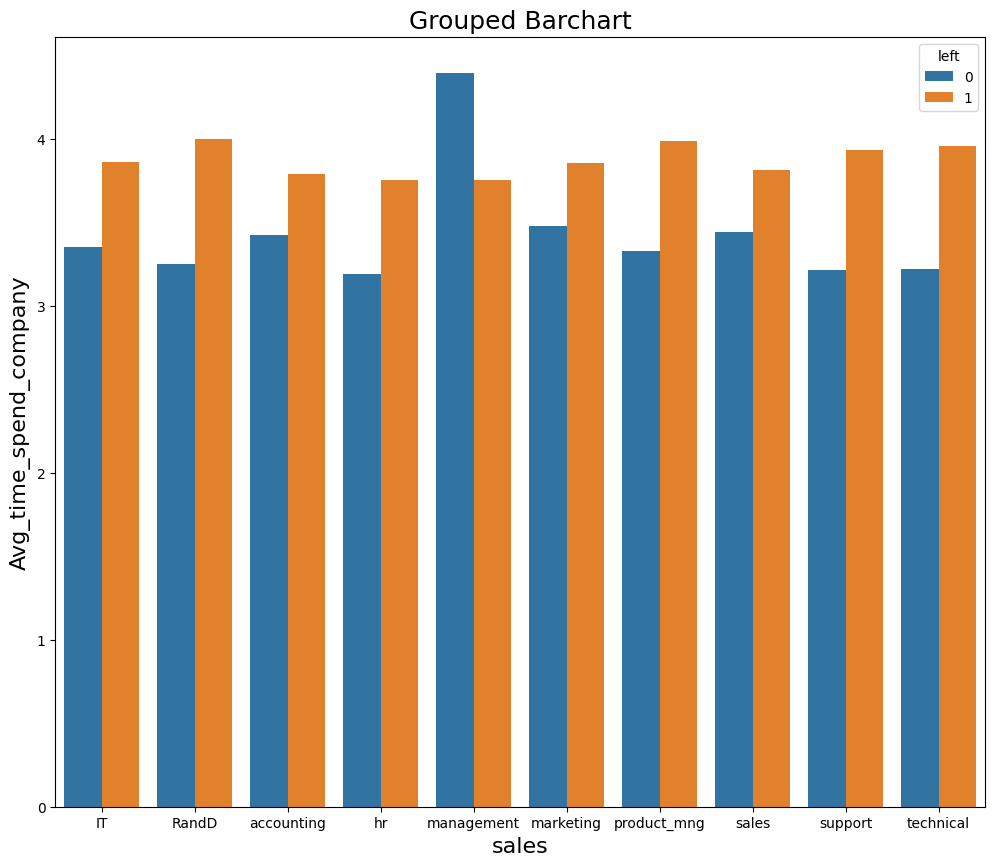

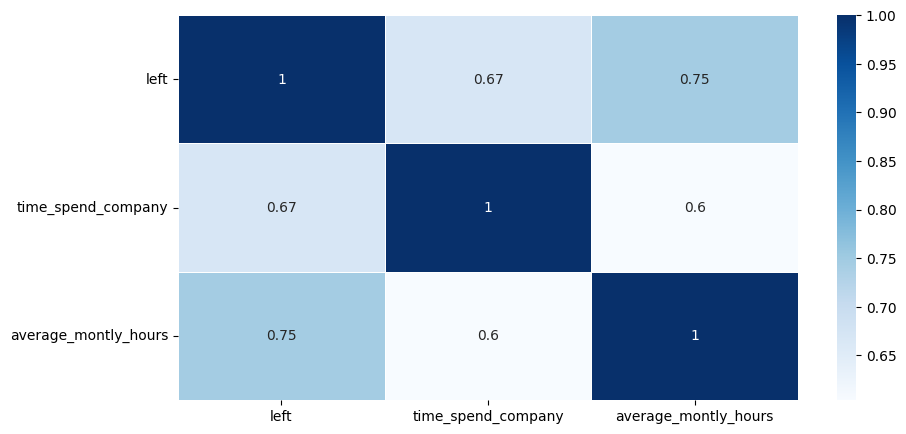

In [13]:
import pandas  as  pd
import datetime
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

excel_sheet = pd.read_csv("/content/drive/MyDrive/Data_set_rekha/HR_comma_sep.csv")
#print(excel_sheet.head(5))

#how many employeev in each department
data_sheet = excel_sheet.groupby('sales').size().to_frame("total").reset_index()
data_sheet1 = data_sheet.sort_values(by="total",ascending=True)
print(data_sheet1)

#left and number of employees  and rank
data_left = excel_sheet.where(excel_sheet["left"] == 1).groupby('sales').size().to_frame("tot").reset_index()
data_left ['rank'] = data_left['tot'].rank(ascending=False)
print(data_left)

#average
df_avg_time_spend = excel_sheet.groupby(["left", "sales"])["time_spend_company","average_montly_hours"].mean().reset_index()
print(df_avg_time_spend)

#max and min # left
df2_time = excel_sheet.groupby(["left", "sales"]).agg({"time_spend_company":['min', 'max'], "average_montly_hours":['min','max']}).reset_index()
df2_time.columns = ["left","sales","min_time_spend_company","max_time_spend_company","min_average_monthly_hours","max_average_monthly_hours"]
print(df2_time, 10)

#max and min in each department
df3_last = excel_sheet.groupby(["left", "sales"]).agg({"last_evaluation":['min', 'max','mean'], "satisfaction_level":['min','max','mean']}).reset_index()
df3_last.columns = ["left","sales","min_last_evaluation","max_last_evaluation","avg_last_evaluation","min_satisfaction_level","max_satisfaction_level","avg_satisfaction_level"]
print(df3_last, 10)

#each dept count
df_work_accidents = excel_sheet.groupby(["left", "sales"]).agg({"Work_accident":['sum'], "promotion_last_5years":['sum']}).reset_index()
df_work_accidents.columns = ["left","sales","count_work_accident","count_promotion_last_5years"]
print(df_work_accidents, 10)

# 7 and 8 cobine

df_merge_1 = pd.merge(df_avg_time_spend, df2_time, on=['left','sales'], how='inner')
df_merge_2 = pd.merge(df_merge_1, df3_last, on=['left','sales'], how='inner')
df_merge_3 = pd.merge(df_merge_2, df_work_accidents, on=['left','sales'], how='inner')
print(df_merge_3, 2)

plt.figure(figsize=(12, 10))
sns.barplot(x="sales", y="time_spend_company", hue="left", data=df_merge_3)
plt.ylabel("Avg_time_spend_company", size=16)
plt.xlabel("sales", size=16)
plt.title("Grouped Barchart", size=18)

# heat plot map
plt.figure(figsize=(10,5))
sns.heatmap(df_avg_time_spend.corr(), annot=True, linewidth= 0.5, cmap='Blues')